<a href="https://colab.research.google.com/github/MarSchw1/lab1_template/blob/main/Kopia_av_8_SCA_Pilgrim_Bank_Case_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pilgrim bank: Customer profitability**

**Business case:**
Based on the sample of customer data for 1999:



1.   What can Green conclude about average customer profitability for Pilgrim Bank's entire customer population?
2.   Is the difference in average profitability between online and offline customers in the sample indicative of a meaningful difference in profitability across these groups for Pilgrim Bank's entire customer population?
3.   What role do customer demographics play in analyzing customer profitability for online and offline customers? Hint: when needed, consider the impact of missing data and how to tackle it.



In [ ]:
#Data set exploration
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

In [ ]:
!gdown --id 1hduTxsclHmuqEeqe_lYUDpt1ulBT1tUR

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hduTxsclHmuqEeqe_lYUDpt1ulBT1tUR
To: /content/Pilgrim_case_data.xlsx
100% 1.57M/1.57M [00:00<00:00, 82.7MB/s]


In [ ]:
df = pd.read_excel('/content/Pilgrim_case_data.xlsx')

###**In general, what is the situation presented in the Pilgrim Bank case?**

What is Alan Green task?

In [ ]:
df

,ID,9Profit,9Online,9Age,9Inc,9Tenure,9District,0Profit,0Online,9Billpay,0Billpay
0,1,21,0,NaN,NaN,6.33,1200,NaN,NaN,0,NaN
1,2,-6,0,6.0,3.0,29.50,1200,-32.0,0.0,0,0.0
2,3,-49,1,5.0,5.0,26.41,1100,-22.0,1.0,0,0.0
3,4,-4,0,NaN,NaN,2.25,1200,NaN,NaN,0,NaN
4,5,-61,0,2.0,9.0,9.91,1200,-4.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31629,31630,-50,0,5.0,5.0,3.75,1200,1.0,0.0,0,0.0
31630,31631,458,0,3.0,8.0,12.08,1300,423.0,1.0,0,0.0
31631,31632,-83,0,6.0,4.0,15.83,1200,-60.0,0.0,0,0.0
31632,31633,92,1,1.0,6.0,5.41,1200,170.0,1.0,0,0.0


##**CUSTOMER PROFITABILITY**

**Why would a bank care about the variation in customer profitability? Are all customers profitable?**

<Axes: xlabel='acum_count', ylabel='acum_profit'>

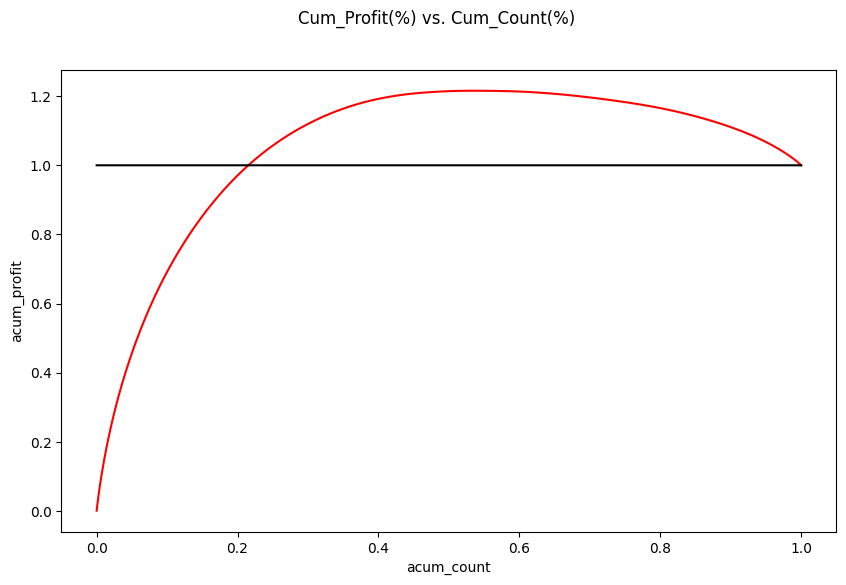

In [ ]:
df_acum =pd.DataFrame()
df_acum['acum_count'] = np.arange(df['ID'].min()/df['ID'].max(),1+df['ID'].min()/df['ID'].max(),df['ID'].min()/df['ID'].max())
df_acum['profit'] = sorted(df['9Profit'],reverse=True)/df['9Profit'].sum()
df_acum['acum_profit'] = df_acum['profit'].cumsum(axis=0)

f, axes = plt.subplots(figsize=(10,6))
f.suptitle('Cum_Profit(%) vs. Cum_Count(%)')
sns.lineplot( x = df_acum['acum_count'],y=df_acum['acum_profit'], color='red')
sns.lineplot(x=df_acum['acum_count'],y=1, color='black')

**What is the cause of the variation?**



*   Balance in deposit account
*   Net interest spread
*   Fees
*   Interest from loans
*   (Cost to serve)




In [ ]:
df['9Profit'].describe()

count    31634.000000
mean       111.502687
std        272.839391
min       -221.000000
25%        -34.000000
50%          9.000000
75%        164.000000
max       2071.000000
Name: 9Profit, dtype: float64

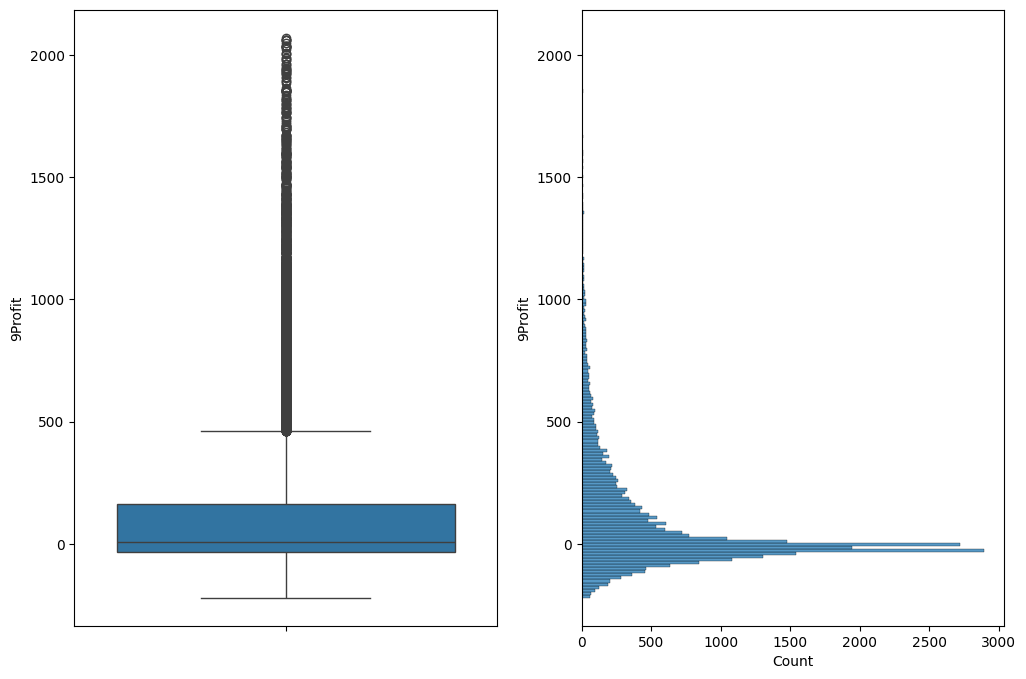

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12,8))
sns.boxplot(y='9Profit',data=df, ax=ax[0])
sns.histplot(y='9Profit',data=df, ax=ax[1])

fig.show()

###**The average profitability of customer**



*   How big is the sample size that Alan Green is evaluating? - 31 634
*   How can we make inferences from this relatively small sample to a population of 5 millions? - We can say something if we assume that the sample is a random sample.





*   What is the average profit from the sample?
*   Can the uncertainty in the sample for saying something about the population be captured? How?



In [ ]:
df['9Profit'].describe()

count    31634.000000
mean       111.502687
std        272.839391
min       -221.000000
25%        -34.000000
50%          9.000000
75%        164.000000
max       2071.000000
Name: 9Profit, dtype: float64



*   What does a confidence interval mean?
*   Can we ever be 100% certain? Why?
*   The distribution is not normal (Gaussian), is it fine to use the confidence limits which are based on Gaussian distribution?





(-1.0, 1.0)

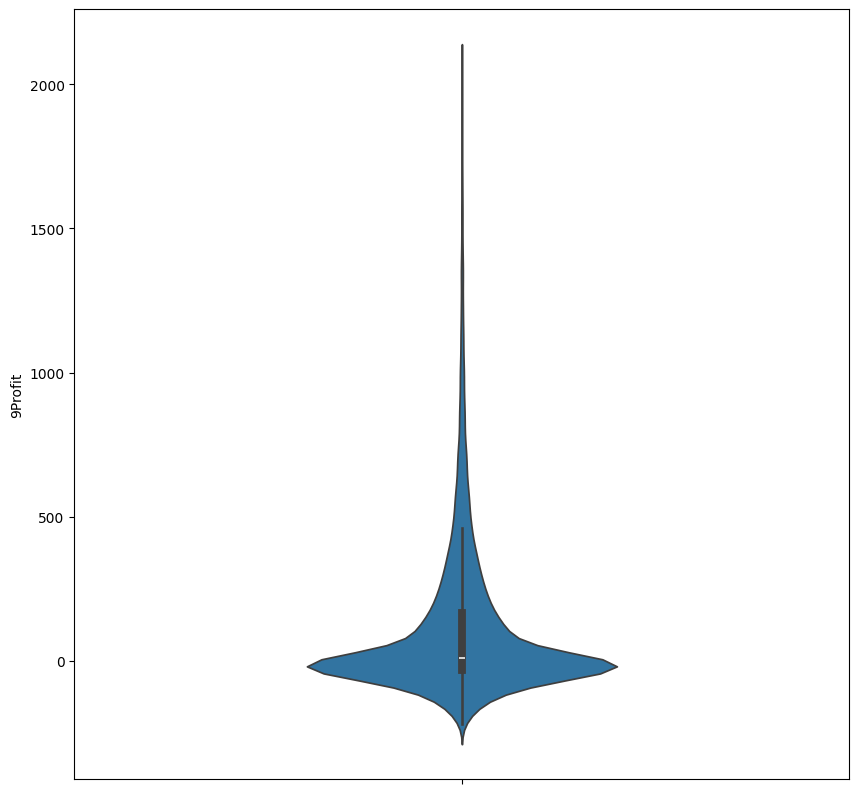

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.violinplot(df['9Profit'],inner='box',)
plt.xlim(-1, 1)

In [ ]:
print('Sample mean: ',df['9Profit'].mean())
print('Sample Std Dev: ',df['9Profit'].std())
print('Sample Std Err Mean: ',df['9Profit'].sem())
print('Sample Upper 95% Mean: ',max(stats.norm.interval(confidence=0.95, loc=np.mean(df['9Profit']), scale=stats.sem(df['9Profit']))))
print('Sample Lower 95% Mean: ',min(stats.norm.interval(confidence=0.95, loc=np.mean(df['9Profit']), scale=stats.sem(df['9Profit']))))
print('Sample Size: ',df['9Profit'].count())

Sample mean:  111.50268698236076
Sample Std Dev:  272.839391497397
Sample Std Err Mean:  1.534016451199508
Sample Upper 95% Mean:  114.50930397840374
Sample Lower 95% Mean:  108.49606998631778
Sample Size:  31634


##**Test your knowledge**

Which of the following statements best describes the distribution of a sum of two uniform distribution?

A.   Uniform distribution

B.   Gaussian (normal) distribution

C.   Weibull distribution

D.   Gamma distribution

___

##**Difference in average profitability (Online vs Offline)**



*   What is the average profitability of online?
*   What is the average profitability of offline?
*   Is the difference meaningful?




*Using t-test*

In [ ]:
df_online = df[df['9Online']==1]
df_offline = df[df['9Online']==0]

In [ ]:
df_online.head()

In [ ]:
df_offline.head()

In [ ]:
!pip install researchpy
import researchpy as rp

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rp.ttest(group1= df_online['9Profit'], group1_name= "Online",
         group2= df_offline['9Profit'], group2_name= "Offline")

(   Variable        N        Mean          SD        SE   95% Conf.    Interval
 0    Online   3854.0  116.666840  283.664637  4.569297  107.708369  125.625310
 1   Offline  27780.0  110.786249  271.300975  1.627741  107.595797  113.976701
 2  combined  31634.0  111.502687  272.839391  1.534016  108.495955  114.509419,
                  Independent t-test     results
 0  Difference (Online - Offline) =       5.8806
 1             Degrees of freedom =   31632.0000
 2                              t =       1.2539
 3          Two side test p value =       0.2099
 4         Difference < 0 p value =       0.8951
 5         Difference > 0 p value =       0.1049
 6                      Cohen's d =       0.0216
 7                      Hedge's g =       0.0216
 8                 Glass's delta1 =       0.0207
 9               Point-Biserial r =       0.0070)

In [ ]:
statistic, pvalue = stats.ttest_ind(df_online['9Profit'],df_offline['9Profit'], equal_var=True)
print('t-statistic', statistic)
print('p-value: ', pvalue)

t-statistic 1.2538994682897255
p-value:  0.20988781482156962


In [ ]:
df.rename(columns={'9Online':'Online'},inplace=True)
df.rename(columns={'9Profit':'Profit'},inplace=True)

*Using regression*

In [ ]:
df['9District']=df['9District'].astype('str')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         31634 non-null  int64  
 1   Profit     31634 non-null  int64  
 2   Online     31634 non-null  int64  
 3   9Age       23345 non-null  float64
 4   9Inc       23373 non-null  float64
 5   9Tenure    31634 non-null  float64
 6   9District  31634 non-null  object 
 7   0Profit    26396 non-null  float64
 8   0Online    26415 non-null  float64
 9   9Billpay   31634 non-null  int64  
 10  0Billpay   26415 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 2.7+ MB


In [ ]:
model1 = 'Profit ~ Online'
lm    = ols(formula = model1, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.572
Date:                Tue, 23 Apr 2024   Prob (F-statistic):              0.210
Time:                        14:28:51   Log-Likelihood:            -2.2232e+05
No. Observations:               31634   AIC:                         4.446e+05
Df Residuals:                   31632   BIC:                         4.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.7862      1.637     67.678      0.0



*   Can we say that online channel has no impact on profitability?

We cannot say that wether customers online or not affects the mean but we cannot say that it doesnt affect the mean either. Its inconclusive.  


##**Absence of evidence ≠ evidence of absence**



*   Is there something clouding our view to see the true relationship?
*   Is the difference (online vs offline profit) affected by different age, income, tenure, or district?

(e.g. younger customers might be more likely both to be online and to be less profitable?)




In [ ]:
df.columns

Index(['ID', 'Profit', 'Online', '9Age', '9Inc', '9Tenure', '9District',
       '0Profit', '0Online', '9Billpay', '0Billpay'],
      dtype='object')

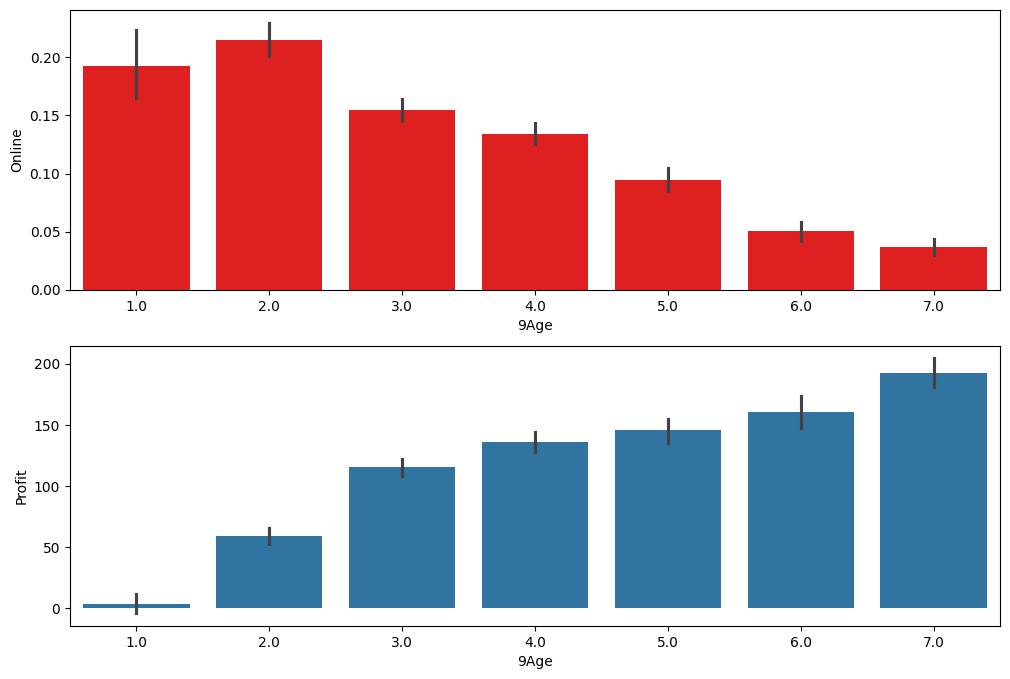

In [ ]:
fig, ax =plt.subplots(2,1, figsize=(12,8))

sns.barplot(data=df,x='9Age',y='Profit',ax=ax[1])
sns.barplot(data=df,x='9Age',y='Online',ax=ax[0], color='red')

fig.show()

**Gross effect vs Net effect**

If age is controlled for (held constant, fixed), what happens to the difference betweeen online and offline customer profitability?

In [ ]:
df.rename(columns={'9Age':'Age'},inplace=True)

In [ ]:
model2 = 'Profit ~ Online + Age'
lm    = ols(formula = model2, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     264.9
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          1.67e-114
Time:                        14:33:31   Log-Likelihood:            -1.6452e+05
No. Observations:               23345   AIC:                         3.291e+05
Df Residuals:                   23342   BIC:                         3.291e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0804      5.059      3.376      0.0

Two customers of the same age, one online and the other not, the online customer will represent on average, $27.188 more profit to the bank.



*   Is there anything about the results that concern you?
* How many data points were used to generate the multiple regression results, Profit = f(online, age)?



##**Strategy for Managing Missing Data**

We lost 8289 observations. If there is missing data for a variable, the default for the program (e.g. JMP) is to drop the customer out of the analysis. Is this OK?

A.  Yes

B.  No

C.  Don't know

What if the profitability (as the performance measure) of Group 1 (with age data, n1= 23345) and Group 2 (missing age data, n1= 8289) differ significantly?

Let's check if profitability in Group 1 (with age data, n1= 23345) differs from Group 2 (missing age data, n1= 8289).

Make a new column AgeExists, it equals 1 if the age exists, otherwise 0 (i.e. missing). Then check with regression method.

<Axes: >

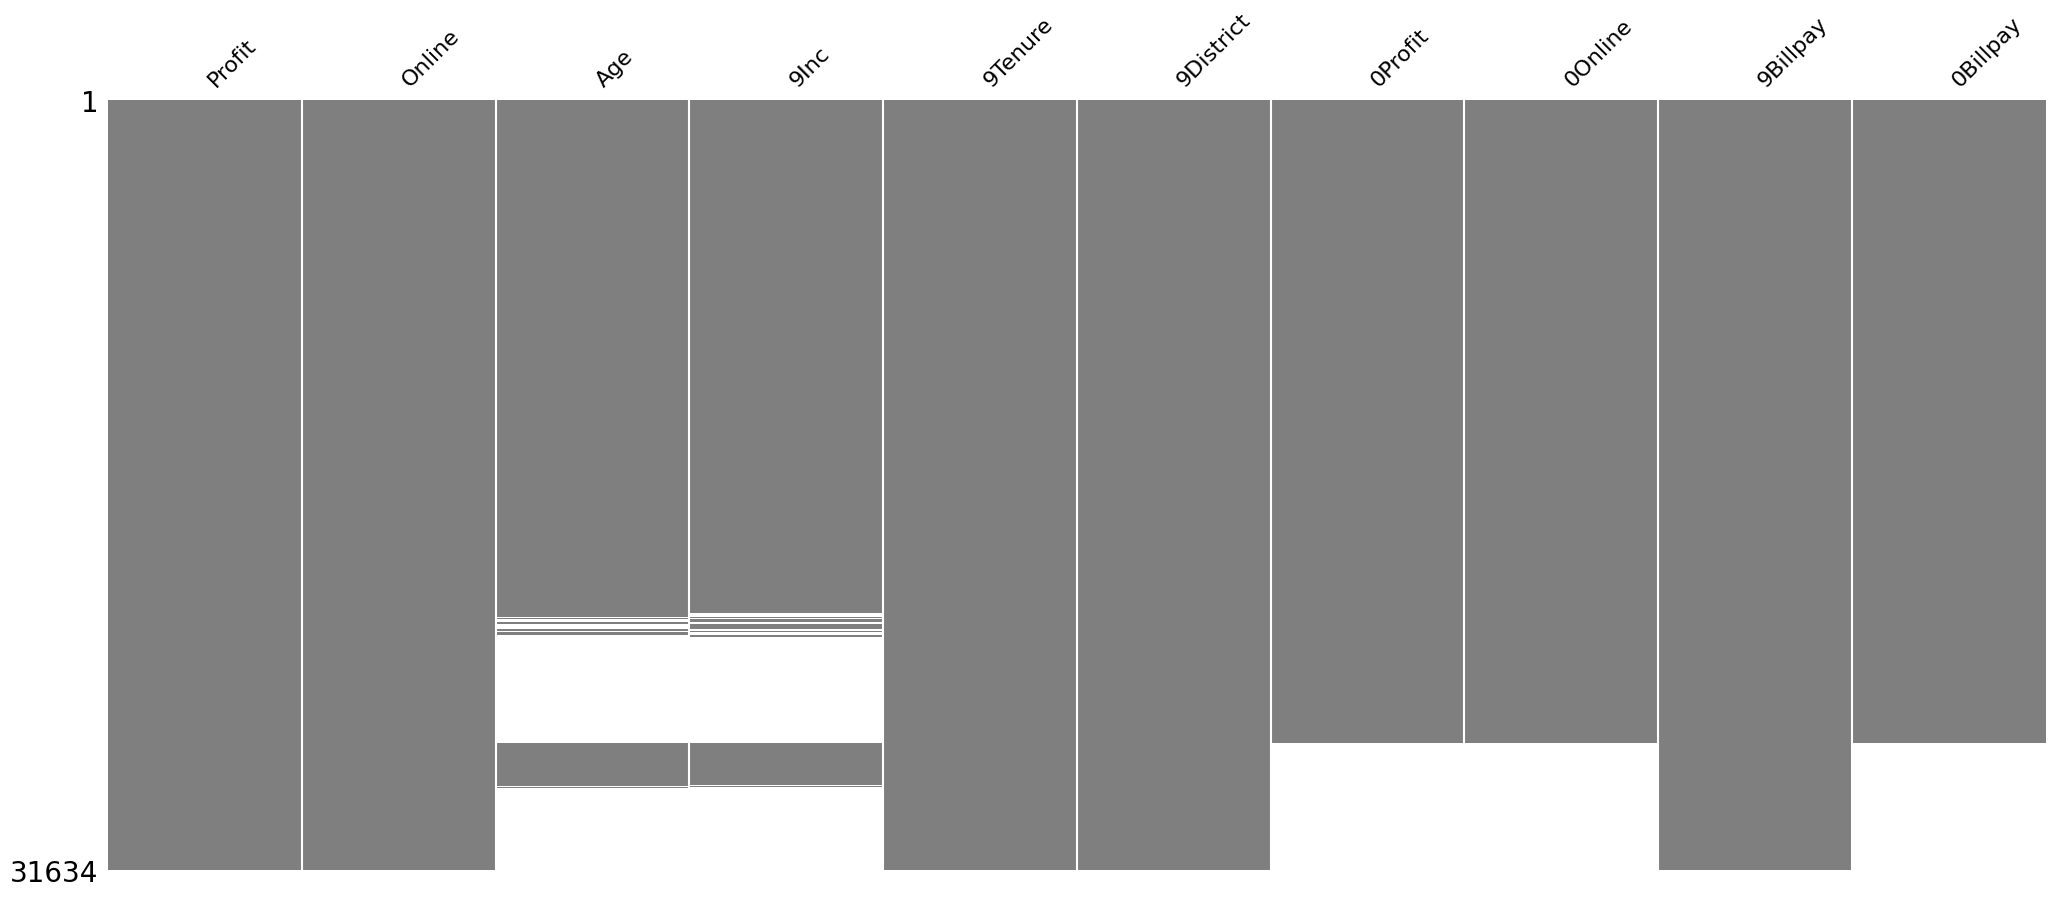

In [ ]:
import missingno as msno

msno.matrix(df.iloc[:,1:],sort="descending",sparkline=False,color=(0.5,0.5,0.5))

In [ ]:
df['Age'].describe()

count    23345.000000
mean         4.046048
std          1.642316
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Age, dtype: float64

###**Missing Values Procedure for the variable "AGE"**

In [ ]:
df['Age_Exists'] = 1
df.loc[pd.isna(df['Age']), 'Age_Exists'] = 0



*   Based on the regression results, do the missing data introduce bias into the sample?



In [ ]:
model3 = 'Profit ~ Age_Exists'
lm    = ols(formula = model3, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     225.7
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           7.70e-51
Time:                        14:41:56   Log-Likelihood:            -2.2221e+05
No. Observations:               31634   AIC:                         4.444e+05
Df Residuals:                   31632   BIC:                         4.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.9625      2.986     24.433      0.0



*   Is the difference $27.2 in profitability between online and offline customers an overstatement or understatement? - Overestimate



Strategy for handling missing data:



1.   Replace with Zero
2.   Replace with average



In [ ]:
df['AgeZero'] = df['Age'].fillna(0)

In [ ]:
model4 = 'Profit ~ Online + AgeZero'
lm    = ols(formula = model4, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     349.3
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          8.59e-151
Time:                        14:51:20   Log-Likelihood:            -2.2197e+05
No. Observations:               31634   AIC:                         4.440e+05
Df Residuals:                   31631   BIC:                         4.440e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.0311      2.601     21.923      0.0

In [ ]:
df['AgeAvg'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
model5 = 'Profit ~ Online + AgeAvg'
lm    = ols(formula = model5, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     278.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          1.13e-120
Time:                        14:52:42   Log-Likelihood:            -2.2204e+05
No. Observations:               31634   AIC:                         4.441e+05
Df Residuals:                   31631   BIC:                         4.441e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9111      4.776      1.028      0.3

We want to remove the effects of missing data without having to drop the data altogether. (Solution: control for whether the data are included or not).

In [ ]:
model6 = 'Profit ~ Online + AgeAvg + Age_Exists'
lm    = ols(formula = model6, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     262.1
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          4.76e-168
Time:                        14:53:12   Log-Likelihood:            -2.2193e+05
No. Observations:               31634   AIC:                         4.439e+05
Df Residuals:                   31630   BIC:                         4.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.6628      5.377     -6.074      0.0

In [ ]:
model7 = 'Profit ~ Online + AgeZero + Age_Exists'
lm    = ols(formula = model7, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     262.1
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          4.76e-168
Time:                        14:53:35   Log-Likelihood:            -2.2193e+05
No. Observations:               31634   AIC:                         4.439e+05
Df Residuals:                   31630   BIC:                         4.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.9263      3.000     23.643      0.0

**Let's move to income. What do we find?**

In [ ]:
df.rename(columns={'9Inc':'Inc'},inplace=True)

In [ ]:
model8 = 'Profit ~ Online + AgeAvg + Age_Exists + Inc'
lm    = ols(formula = model8, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     279.3
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          6.17e-235
Time:                        14:54:00   Log-Likelihood:            -1.6448e+05
No. Observations:               23373   AIC:                         3.290e+05
Df Residuals:                   23368   BIC:                         3.290e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -125.5405     13.036     -9.631      0.0

How many data points were used to generate the multiple regression results, Profit = f(Online, AgeAvg, Age_Exists, Inc)?

31634 minus 23373 = **8261 individuals missing!**

Based on the regression results, do the missing data introduce bias into the sample?

##**EXERCISE**

Implement the same "Missing values procedure for variable AGE" but now to the "INC" variable, i.e., income. Please build and interpret the following models:



*   model9 = 'Profit ~ Income_Exists'
*   model10 = 'Profit ~ Online + AgeAvg + Age_Exists + IncomeAvg + Income_Exists'
*   model11 = 'Profit ~ Online + AgeAvg + Age_Exists + IncomeZero + Income_Exists'



In [ ]:
df['Income_Exists'] = 1
df.loc[pd.isna(df['Inc']), 'Income_Exists'] = 0

In [ ]:
model9 = 'Profit ~ Income_Exists'
lm    = ols(formula = model9, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     243.8
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           9.22e-55
Time:                        14:55:48   Log-Likelihood:            -2.2220e+05
No. Observations:               31634   AIC:                         4.444e+05
Df Residuals:                   31632   BIC:                         4.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        71.3650      2.990     23.865

Using similar technique as in age, we have:

In [ ]:
df['IncomeAvg'] = df['Inc'].fillna(df['Inc'].mean())

In [ ]:
df['IncomeZero'] = df['Inc'].fillna(0)

In [ ]:
model10 = 'Profit ~ Online + AgeAvg + Age_Exists + IncomeAvg + Income_Exists'
lm    = ols(formula = model10, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     288.7
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          3.87e-303
Time:                        14:55:58   Log-Likelihood:            -2.2161e+05
No. Observations:               31634   AIC:                         4.432e+05
Df Residuals:                   31628   BIC:                         4.433e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -140.6572      6.827    -20.604

In [ ]:
model11 = 'Profit ~ Online + AgeAvg + Age_Exists + IncomeZero + Income_Exists'
lm    = ols(formula = model11, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     288.7
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          3.87e-303
Time:                        14:56:06   Log-Likelihood:            -2.2161e+05
No. Observations:               31634   AIC:                         4.432e+05
Df Residuals:                   31628   BIC:                         4.433e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -38.1914      5.336     -7.158



---



---



Two customers of the same age and same income, one online and the other not, the online customer, **on average**, is **$11.87** more profitable than the offline one.

##**Controlling for the remaining demographics**

What about variation within tenure and geographic region (district)? Note that district is a nominal variable

In [ ]:
df.columns

Index(['ID', 'Profit', 'Online', 'Age', 'Inc', '9Tenure', '9District',
       '0Profit', '0Online', '9Billpay', '0Billpay', 'Age_Exists', 'AgeZero',
       'AgeAvg', 'Income_Exists', 'IncomeAvg', 'IncomeZero'],
      dtype='object')

In [ ]:
df.rename(columns={'9Tenure':'Tenure','9District':'District'},inplace=True)

In [ ]:
df.info()

In [ ]:
type(df['District'][1])

str

In [ ]:
model12 = 'Profit ~ Online + Age_Exists + AgeZero + Income_Exists + IncomeZero + Tenure + C(District, Treatment(reference=2))'
lm    = ols(formula = model12, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     262.8
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:56:21   Log-Likelihood:            -2.2130e+05
No. Observations:               31634   AIC:                         4.426e+05
Df Residuals:                   31625   BIC:                         4.427e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

**Conclusion**
Controlling for tenure, age, income and district, Pilgram Bank customers who utilize the online channel are, on average, **$13.82** more profitable than those who are offline.

**Implication/policy**
The efforts invested for enhancing online usage should not cost more than, on average, $13.82 for each customer

##**Cause and effect between online channel use and customer profitability**



*   Are more profitable customers attracted to online banking?

OR

*   Does online banking makes customers more profitable?



REFLECTIONS



*   What lessons have you learnt?

*   What left unanswered?



___

# **Pilgrim Bank's Customer Retention**

**QUESTIONS:**


**Q1.**  How well does knowing whether a customer used online banking in 1999 predict how profitable that customer will be in 2000?

**Q2.**   How well does knowing whether a customer used online banking in 1999 predict whether or not that customer stays with the bank through 2000?

**Q3.**  Does knowing the demographics of a customer (e.g. age and/or income) in 1999 help to predict customer profitability and/or retention in 2000?



**Customer profitability in 2000**

If we know how profitable a customer is today, why do we need to worry about how profitable they are tomorrow?

Is current profitability alone sufficient for decisions made about individual customer relationships?

###**How well does knowing whether a customer used online banking in 1999 predict how profitable that customer will be in 2000?**

In [ ]:
df.rename(columns={'0Profit':'Zero_Profit'},inplace=True)

In [ ]:
model13 = 'Zero_Profit ~ Online'
lm    = ols(formula = model13, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Zero_Profit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.45
Date:                Tue, 23 Apr 2024   Prob (F-statistic):            0.00123
Time:                        14:56:31   Log-Likelihood:            -1.9493e+05
No. Observations:               26396   AIC:                         3.899e+05
Df Residuals:                   26394   BIC:                         3.899e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    141.9002      2.565     55.319      0.0

In [ ]:
lm.rsquared

0.0003957148218264317

What do you think of the result?

A. Online banking in 1999 can predict customer profitability in 2000 well (*p-value* much smaller than 0.001)

B. Online banking in 1999 cannot explain variation in customer profitability in 2000

C. Don't know

**What are the differences between the following models?**

In [ ]:
model14 = 'Zero_Profit ~ Online + Age_Exists + AgeZero + Income_Exists + IncomeZero + Tenure + C(District, Treatment(reference=2))'
lm    = ols(formula = model14, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Zero_Profit   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          6.95e-193
Time:                        14:56:43   Log-Likelihood:            -1.9448e+05
No. Observations:               26396   AIC:                         3.890e+05
Df Residuals:                   26387   BIC:                         3.890e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
model15 = 'Profit ~ Online + Age_Exists + AgeZero + Income_Exists + IncomeZero + Tenure + C(District, Treatment(reference=2))'
lm    = ols(formula = model15, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     262.8
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:56:48   Log-Likelihood:            -2.2130e+05
No. Observations:               31634   AIC:                         4.426e+05
Df Residuals:                   31625   BIC:                         4.427e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Look at the null values. Some have left!

In [ ]:
df.info()

In [ ]:
df['Zero_Profit'].isnull().value_counts()

In [ ]:
msno.matrix(df.iloc[:,1:],sort='descending',sparkline=False,color=(0.5,0.5,0.5))

Who are these 5238 customers?

What to do with the missing data here?

A. Replace missing profit in 2000 with zero

B. Replace missing profit in 2000 with mean

C. Create a missing indicator variable {0,1}, then use a replacement (e.g. mean or zero) for the missing profit data in 2000

D. Do nothing

E. Don't know

####**Let's look at those who stayed**

Is there other factor we are not considering that might help the past predict the present?

In [ ]:
model16 = 'Zero_Profit ~ Online + Age_Exists + AgeZero + Income_Exists + IncomeZero + Tenure + C(District, Treatment(reference=2))'
lm    = ols(formula = model16, data = df).fit()
print(lm.summary())

In [ ]:
model17 = 'Zero_Profit ~ Online + Age_Exists + AgeZero + Income_Exists + IncomeZero + Tenure + C(District, Treatment(reference=2)) + Profit'
lm    = ols(formula = model17, data = df).fit()
print(lm.summary())

What to do with those variables of which p-values are high?

A.  Remove them immediately

B.  Keep them

C.  Check if removing them affects the R-sq

D.  Remove one at a time, while checking the p-values of other variables

E.  Don't know

Is there other factor we are not considering that might help the past predict the present?


In [ ]:
model18 = 'Zero_Profit ~ Online + Age_Exists + AgeZero + Income_Exists + IncomeZero + Tenure + C(District, Treatment(reference=2))'
lm    = ols(formula = model18, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Zero_Profit   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          6.95e-193
Time:                        14:57:16   Log-Likelihood:            -1.9448e+05
No. Observations:               26396   AIC:                         3.890e+05
Df Residuals:                   26387   BIC:                         3.890e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
model19 = 'Zero_Profit ~ Online + Age_Exists + AgeZero + Income_Exists + IncomeZero + Tenure + C(District, Treatment(reference=2)) + Profit'
lm    = ols(formula = model19, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Zero_Profit   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     1659.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:57:21   Log-Likelihood:            -1.8902e+05
No. Observations:               26396   AIC:                         3.781e+05
Df Residuals:                   26386   BIC:                         3.781e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
model20 = 'Zero_Profit ~ Online + Tenure + Profit'
lm    = ols(formula = model20, data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Zero_Profit   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     4944.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:57:24   Log-Likelihood:            -1.8905e+05
No. Observations:               26396   AIC:                         3.781e+05
Df Residuals:                   26392   BIC:                         3.781e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9563      3.231     10.201      0.0

Did the bank actually need to purchase demographic data, which a lot of other banks do?

###**How well does knowing whether a customer used online banking in 1999 predict whether or not that customer stays with the bank through 2000?**

What makes one stay or leave the bank?

Can the bank predict it?

In [ ]:
df['Retain'] = np.where(df.Zero_Profit.notnull(),1, 0)

In [ ]:
df['Retain'].value_counts()

In [ ]:
df['Retain'].value_counts(normalize=True).mul(100).round(4).astype(str) + '%'

In [ ]:
sns.barplot(x=df['Retain'].unique(),y=df['Retain'].value_counts())

**Customer retention using OLS regression**

Let's now investigate retention.

What is the gross effect of 1999 online use on retention?

In [ ]:
model21 = 'Retain ~ Online'
lm    = ols(formula = model21, data = df).fit()
print(lm.summary())

In [ ]:
lm.rsquared

In [ ]:
pd.crosstab(df.Online,df.Retain,margins=True)

In [ ]:
pd.crosstab(df.Online,df.Retain,margins=True,normalize='index')

The gross effect of banking online is an increase of 2.2% in the probability of retention. In other words, banking online in 1999 results in an expected change of 2.2% in 2000 retention rates!

In [ ]:
0.85339-0.83178

In [ ]:
model22 = 'Retain ~ Online + Tenure + C(District, Treatment(reference=2)) + Age_Exists + AgeZero + Income_Exists + IncomeZero'
lm    = ols(formula = model22, data = df).fit()
print(lm.summary())

In [ ]:
model23 = 'Retain ~ Online + Tenure + C(District, Treatment(reference=2)) + Age_Exists + AgeZero + Income_Exists + IncomeZero + Profit'
lm    = ols(formula = model23, data = df).fit()
print(lm.summary())

####**Customer retention using OLS regression**

In [ ]:
df['Retain_predicted'] = lm.predict(df[['District','Online','Tenure','Age_Exists','AgeZero','Income_Exists','IncomeZero','Profit']])

In [ ]:
df['Retain_predicted'].describe()

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12,8))
sns.boxplot(y='Retain_predicted',data=df, ax=ax[0])
sns.histplot(y='Retain_predicted',data=df, ax=ax[1])

fig.show()

####**Customer retention using logistics regression**

When the dependent variable (Y) is categorical (including binary), we no longer use OLS regression, but instead logistics regression. The interpretation of the coefficients are NOT the same as in OLS regression.


Key concepts: **Odds** and **Odds ratio**.

If the probability of winning is 0.8, what are the odds of winning?

In [ ]:
import statsmodels.formula.api as smf

model24 = 'Retain ~ Online'
lm    = smf.logit(formula = model24, data = df).fit()
print(lm.summary())

**The odds**

In [ ]:
pd.crosstab(df.Online,df.Retain,margins=True)

In [ ]:
pd.crosstab(df.Online,df.Retain,margins=True,normalize='index')

Odds for online users:

*   The odds of an online user to stay with the bank are (3289/565) = 5.82 aprox 6.
*   So for every 6 online users who stayed with the bank, there was 1 online user who left the bank. In other words, online users are 6 times more likely to stay with the bank than not.


Odds for offline users:

*   The odds of an offline user to stay with the bank are (23107/4673) = 4.94 aprox 5.
*   So for every 5 offline users who stayed with the bank, there was 1 offline user who left the bank. In other words, offline users are 5 times more likely to stay with the bank than not.

What is the odds ratio?


*   (5.82/4.94) = 1.18
*   The odds of staying with the bank are 1.18 times (or 18%) higher for online users than for offline users.







In [ ]:
model25 = 'Retain ~ Online + Age_Exists + AgeZero + Income_Exists + IncomeZero  + Tenure + C(District, Treatment(reference=2))  + Profit'
lm    = smf.logit(formula = model25, data = df).fit()
print(lm.summary())

In [ ]:
odds_ratios = pd.DataFrame(
    {
        "OR": lm.params,
        "Lower CI": lm.conf_int()[0],
        "Upper CI": lm.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)


**COEFFICIENT INTERPRETATION**

*   ONLINE: The odds of retention are 1.11 times higher (or 11% higher) for online than for offline customers, controlling for age, income, tenure, district, and profit in 1999.
*   TENURE: The odds of retention are 1.04 times higher for each additional year of tenure, all else being equal.
*   DISTRICT: The odds of retention are 1.1 higher for customers who line in District 1200 than for those who live in District 1100, all else being equal.**bold text**




###**Reflections**

What lessons have you learnt?

What left unanswered?